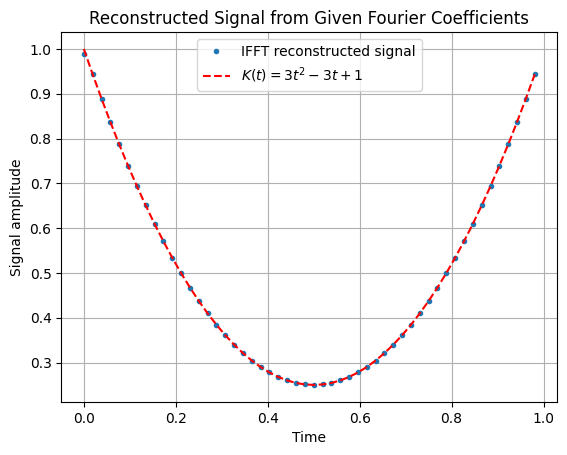

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fourier import get_fourier_coeffs

# Number of sample points (and Fourier coefficients)
N = 52
# Sampling interval (for example, suppose our total time is 1 second)
T = 1.0
d = T / N

# Get the frequency bins. These tell us which Fourier mode (l) corresponds to each index.
freqs = np.fft.fftfreq(N, d=d)

# Initialize an array for the Fourier coefficients
F = np.empty(N, dtype=complex)

# Set the Fourier coefficients:
# For l = 0, set coefficient to 1/2.
# For nonzero l, set coefficient proportional to 1/(|l|^2).
for k, l in enumerate(freqs):
    if l == 0:
        F[k] = 1 / 2
    else:
        F[k] = 3 / (2 * np.pi**2 * abs(l) ** 2)

# Analogously, you can use
F = get_fourier_coeffs(2, T, N, 1 / 2, 3 / (2 * np.pi**2))

# Now, compute the inverse FFT to reconstruct the time-domain signal.
# The result is complex-valued; if the coefficients are set symmetrically,
# the imaginary part should be negligible (numerical noise).
signal = np.fft.ifft(F * N)

# --- Define the time grid and the analytical function ---
t = np.linspace(0, T, N, endpoint=False)
K_t = 3 * t**2 - 3 * t + 1  # the expected Sobolev kernel on [0,1]

# For visualization, we'll plot the real part of the reconstructed signal.
plt.plot(
    np.linspace(0, T, N, endpoint=False),
    signal.real,
    ".",
    label="IFFT reconstructed signal",
)
plt.plot(t, K_t, "r--", label=r"$K(t)=3t^2-3t+1$")
plt.xlabel("Time")
plt.ylabel("Signal amplitude")
plt.title("Reconstructed Signal from Given Fourier Coefficients")
plt.grid(True)
plt.legend()
plt.show()

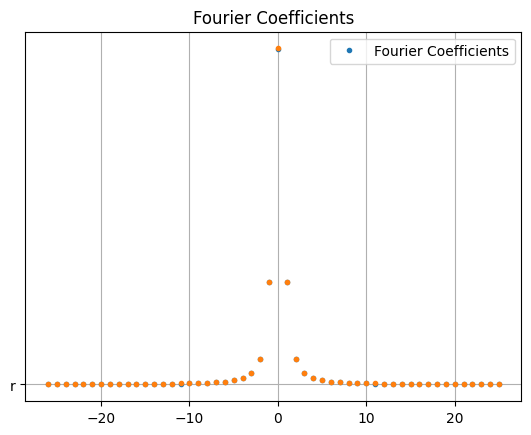

In [8]:
from fourier import compute_fourier_coeff
#plot the fourier coefficinets:
plt.plot(freqs, (F), '.', label = 'Fourier Coefficients')
plt.plot(freqs, (compute_fourier_coeff(K_t,T)), '.', 'r', )
plt.title('Fourier Coefficients')
plt.grid(True)
plt.legend()